/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


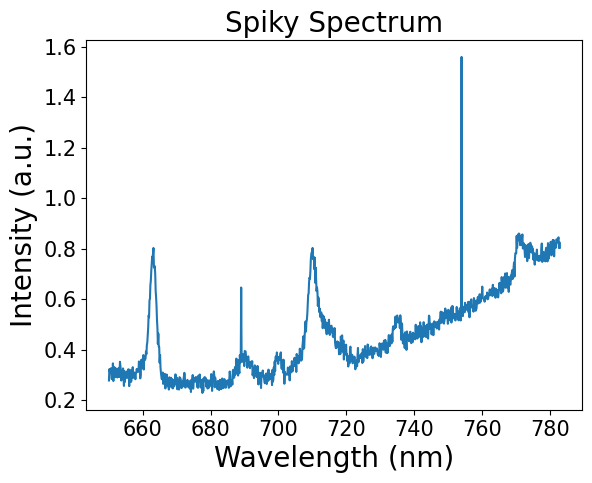

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Load data as a data frame
df = pd.read_csv('/kaggle/input/synthetic-noise/several_spectra_noise.csv', delimiter=',')

# Transform data to numpy arrays
wavelength = np.array(df.Wavelength)
intensity = np.array(df.Intensity)

# Plot spiky spectra
plt.plot(wavelength, intensity)
plt.title('Spiky Spectrum', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Intensity (a.u.)', fontsize=20)
plt.show()

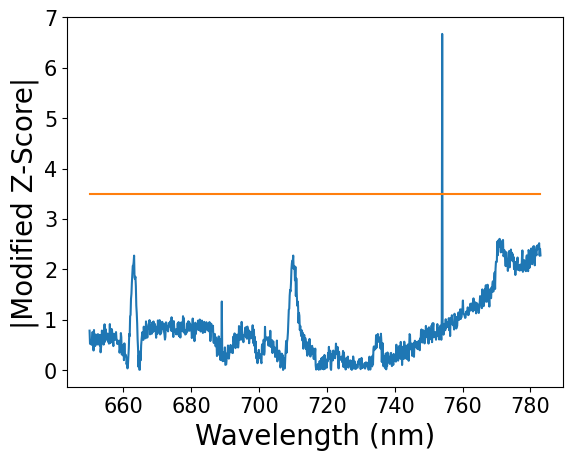

In [2]:
# Calculate z-score (median & median absolute deviation (MAD))
def modified_z_score(intensity):
 median_int = np.median(intensity)
 mad_int = np.median([np.abs(intensity-median_int)])
 modified_z_scores = 0.6745 * (intensity-median_int)/mad_int
 return modified_z_scores
threshold = 3.5
intensity_modified_z_score = np.array(abs(modified_z_score(intensity)))

# Plot z-score spectra with threshold
plt.plot(wavelength, intensity_modified_z_score)
plt.plot(wavelength, threshold*np.ones(len(wavelength)), label = 'threshold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength (nm)',fontsize = 20)
plt.ylabel('|Modified Z-Score|' ,fontsize = 20)
plt.show()

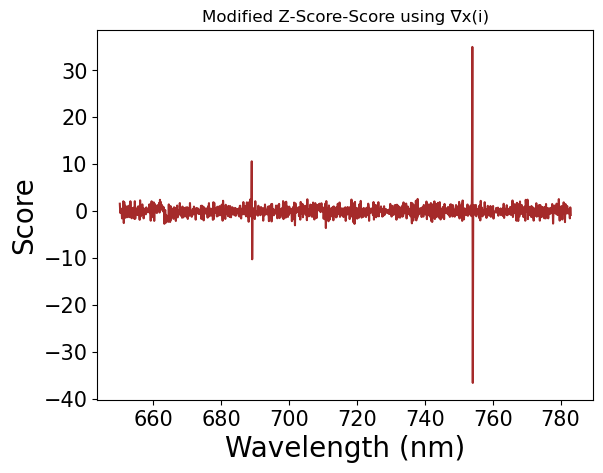

In [3]:
# Calculated ∇x(i):
dist = 0
delta_intensity = [] 
for i in np.arange(len(intensity)-1):
 dist = intensity[i+1]-intensity[i]
 delta_intensity.append(dist)
delta_int = np.array(delta_intensity)
# Alternatively to the for loop one can use: # delta_int = np.diff(intensity)

intensity_modified_z_score = np.array(modified_z_score(delta_int))

# Plot ∇x(i):
plt.plot(wavelength[1:], intensity_modified_z_score, color ='brown')
plt.title('Modified Z-Score-Score using ∇x(i)')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength (nm)', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.show()

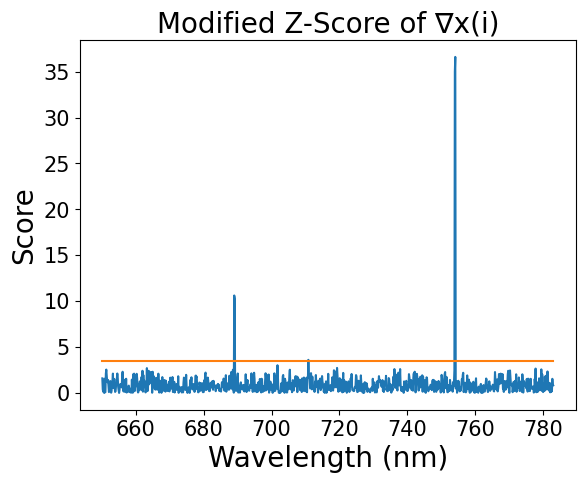

In [4]:
# z-Score of ∇x(i)
threshold = 3.5
intensity_modified_z_score = np.array(np.abs(modified_z_score(delta_int)))

# Plot z-Score of ∇x(i)
plt.plot(wavelength[1:], intensity_modified_z_score)
plt.plot(wavelength[1:], threshold*np.ones(len(wavelength[1:])), label = 'threshold')
plt.title('Modified Z-Score of ∇x(i)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength (nm)', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.show()

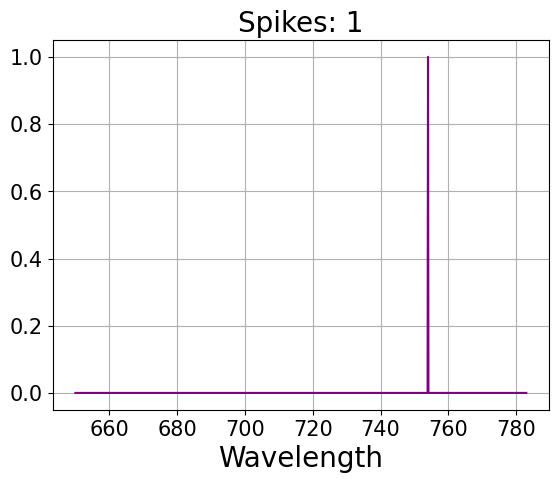

In [5]:
# Plot spikes detected with threshold
# 1 = spikes, 0 = non-spikes
spikes = abs(np.array(modified_z_score(intensity))) > threshold
plt.plot(wavelength, spikes, color = 'purple')
plt.title('Spikes: ' + str(np.sum(spikes)), fontsize = 20)
plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Wavelength', fontsize = 20)
#plt.ylabel( ‘Spike(1) or not(0)?’ ,fontsize = 20)
plt.show()

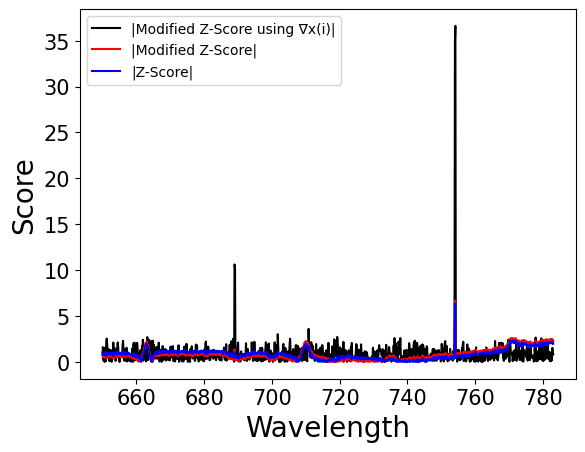

In [6]:
plt.plot(wavelength[1:],np.array(abs(modified_z_score(delta_int))), color='black', label = '|Modified Z-Score using ∇x(i)|')
plt.plot(wavelength, np.array(abs(modified_z_score(intensity))), label = '|Modified Z-Score|', color = 'red')
plt.plot(wavelength, np.array(abs(zscore(intensity))), label = '|Z-Score|', color = 'blue')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel( 'Wavelength' ,fontsize = 20)
plt.ylabel( 'Score' ,fontsize = 20)
plt.legend()
plt.show()